In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sqlite3
import pandas as pd


In [2]:
so_data = pd.read_csv('../data/raw/SALARY DATA.csv')
col_data = pd.read_csv('../data/raw/COL DATA.csv')
gdp_data = pd.read_csv('../data/raw/GDP DATA.csv',encoding='utf-8-sig',skiprows=3)
so_data = so_data.set_index('Unnamed: 0')
print(so_data.shape, col_data.shape, gdp_data.shape)


(607, 11) (121, 8) (266, 70)


In [3]:
so_data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
Unnamed: 0,,,,,,,,,,,
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
col_data.head()


,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5


In [5]:
gdp_data.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,27441.529662,28440.051964,30082.127645,31096.205074,22855.932320,27200.061079,30559.533535,33984.790620,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,186.121835,186.941781,197.402402,225.440494,208.999748,226.876513,...,1329.807285,1520.212231,1538.901679,1493.817938,1344.103210,1522.393346,1628.318944,1510.742951,1567.635839,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,522.082216,525.469771,491.337221,496.602504,510.787063,356.496214,357.261153,413.757895,NaN,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,121.939925,127.454189,133.827044,139.008291,148.549379,155.565216,...,1630.039447,1574.230560,1720.140280,1798.340685,1680.039332,1765.954788,1796.668633,1599.392983,1284.154441,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1807.952941,2437.259712,2538.591391,2189.855714,1449.922867,1925.874661,2929.694455,2309.534130,2122.083690,NaN


In [6]:
so_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


In [7]:
so_data.columns


Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [8]:
col_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            121 non-null    int64  
 1   Country                         121 non-null    object 
 2   Cost of Living Index            121 non-null    float64
 3   Rent Index                      121 non-null    float64
 4   Cost of Living Plus Rent Index  121 non-null    float64
 5   Groceries Index                 121 non-null    float64
 6   Restaurant Price Index          121 non-null    float64
 7   Local Purchasing Power Index    121 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 7.7+ KB


In [9]:
col_data.columns

Index(['Rank', 'Country', 'Cost of Living Index', 'Rent Index',
       'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index'],
      dtype='object')

In [10]:
gdp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            151 non-null    float64
 5   1961            154 non-null    float64
 6   1962            156 non-null    float64
 7   1963            156 non-null    float64
 8   1964            156 non-null    float64
 9   1965            162 non-null    float64
 10  1966            163 non-null    float64
 11  1967            167 non-null    float64
 12  1968            168 non-null    float64
 13  1969            168 non-null    float64
 14  1970            190 non-null    float64
 15  1971            191 non-null    float64
 16  1972            191 non-null    float64
 17  1973            191 non-null    flo

In [11]:
gdp_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024', 'Unnamed: 69'],
      dtype='object')

In [12]:
gdp_recent = gdp_data[['Country Name', '2020', '2021', '2022', '2023', '2024']].copy()
gdp_recent = gdp_recent.rename(columns={'Country Name': 'Country'})
gdp_recent = gdp_recent.melt(id_vars='Country', var_name='Year', value_name='GDP')
gdp_recent['Year'] = gdp_recent['Year'].astype(int)
gdp_recent.head()

,Country,Year,GDP
0,Aruba,2020,22855.932320
1,Africa Eastern and Southern,2020,1344.103210
2,Afghanistan,2020,510.787063
3,Africa Western and Central,2020,1680.039332
4,Angola,2020,1449.922867


In [13]:
so_data["company_location"].unique()[:10]

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK'],
      dtype=object)

In [14]:
col_data.Country.unique()[:10]

array(['Switzerland', 'Bahamas', 'Iceland', 'Singapore', 'Barbados',
       'Norway', 'Denmark', 'Hong Kong (China)', 'United States',
       'Australia'], dtype=object)

In [15]:
gdp_recent.Country.unique()[:10]

array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina'], dtype=object)

In [16]:
import pycountry

def get_country_name(code):
    try:
        return pycountry.countries.get(alpha_2=code).name
    except:
        return code

so_data['Country'] = so_data['company_location'].apply(get_country_name)
so_data['employee_residence'] = so_data['employee_residence'].apply(get_country_name)

so_data['company_location'] = so_data['company_location'].apply(get_country_name)


In [17]:
so_data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Country
Unnamed: 0,,,,,,,,,,,,
0,2020,MI,FT,Data Scientist,70000,EUR,79833,Germany,0,Germany,L,Germany
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,Japan,0,Japan,S,Japan
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,United Kingdom,50,United Kingdom,M,United Kingdom
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,Honduras,0,Honduras,S,Honduras
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,United States,50,United States,L,United States


In [18]:
merged = so_data.merge(col_data[['Country', 'Cost of Living Index',
                                      'Rent Index', 'Local Purchasing Power Index','Cost of Living Plus Rent Index']],
                           on='Country', how='left')
merged.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Country,Cost of Living Index,Rent Index,Local Purchasing Power Index,Cost of Living Plus Rent Index
0,2020,MI,FT,Data Scientist,70000,EUR,79833,Germany,0,Germany,L,Germany,62.2,24.4,120.2,44.0
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,Japan,0,Japan,S,Japan,46.1,13.4,117.0,30.4
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,United Kingdom,50,United Kingdom,M,United Kingdom,62.0,31.1,115.2,47.1
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,Honduras,0,Honduras,S,Honduras,NaN,NaN,NaN,NaN
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,United States,50,United States,L,United States,70.4,41.7,142.3,56.6


In [19]:
merged = merged.merge(gdp_recent, left_on=['Country', 'work_year'],
                      right_on=['Country', 'Year'], how='left')
merged.drop(columns='Year', inplace=True)
merged.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Country,Cost of Living Index,Rent Index,Local Purchasing Power Index,Cost of Living Plus Rent Index,GDP
0,2020,MI,FT,Data Scientist,70000,EUR,79833,Germany,0,Germany,L,Germany,62.2,24.4,120.2,44.0,47379.765195
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,Japan,0,Japan,S,Japan,46.1,13.4,117.0,30.4,40028.734173
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,United Kingdom,50,United Kingdom,M,United Kingdom,62.0,31.1,115.2,47.1,40404.806224
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,Honduras,0,Honduras,S,Honduras,NaN,NaN,NaN,NaN,2307.614943
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,United States,50,United States,L,United States,70.4,41.7,142.3,56.6,64401.507435


In [20]:
merged.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   work_year                       607 non-null    int64  
 1   experience_level                607 non-null    object 
 2   employment_type                 607 non-null    object 
 3   job_title                       607 non-null    object 
 4   salary                          607 non-null    int64  
 5   salary_currency                 607 non-null    object 
 6   salary_in_usd                   607 non-null    int64  
 7   employee_residence              607 non-null    object 
 8   remote_ratio                    607 non-null    int64  
 9   company_location                607 non-null    object 
 10  company_size                    607 non-null    object 
 11  Country                         607 non-null    object 
 12  Cost of Living Index            595 

In [21]:
merged.isna().sum()


work_year                          0
experience_level                   0
employment_type                    0
job_title                          0
salary                             0
salary_currency                    0
salary_in_usd                      0
employee_residence                 0
remote_ratio                       0
company_location                   0
company_size                       0
Country                            0
Cost of Living Index              12
Rent Index                        12
Local Purchasing Power Index      12
Cost of Living Plus Rent Index    12
GDP                                5
dtype: int64

In [22]:
cleaned = merged[['Country','work_year', 'experience_level', 'employment_type',
                  'job_title', 'salary_in_usd', 'remote_ratio',
                  'company_size', 'Cost of Living Index', 'Rent Index',
                  'Local Purchasing Power Index', 'Cost of Living Plus Rent Index', 'GDP']]


In [23]:
cleaned.loc[:, 'GDP'] = cleaned['GDP'].fillna(cleaned['GDP'].mean())

cols = ['Cost of Living Index', 'Rent Index',
        'Local Purchasing Power Index', 'Cost of Living Plus Rent Index']

for col in cols:
    cleaned.loc[:, col] = cleaned[col].fillna(cleaned[col].mean())

for col in cols:
    cleaned.loc[:, col] = cleaned[col].fillna(cleaned[col].mean())


In [24]:

cleaned[cols].isna().sum()


Cost of Living Index              0
Rent Index                        0
Local Purchasing Power Index      0
Cost of Living Plus Rent Index    0
dtype: int64

In [25]:
exp_map = {'EN': 'Entry', 'MI': 'Mid', 'SE': 'Senior', 'EX': 'Executive'}
cleaned.loc[:,'experience_level'] = cleaned['experience_level'].map(exp_map)
'MI', 'SE', 'EN', 'EX'

('MI', 'SE', 'EN', 'EX')

In [26]:
def remote_cat(x):
    if x == 0: return 'Onsite'
    elif x == 50: return 'Hybrid'
    else: return 'Remote'

cleaned.loc[:,'remote_type'] = cleaned['remote_ratio'].apply(remote_cat)


C:\Users\Uman\AppData\Local\Temp\ipykernel_23564\542069804.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned.loc[:,'remote_type'] = cleaned['remote_ratio'].apply(remote_cat)


In [27]:
cleaned.head()

,Country,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size,Cost of Living Index,Rent Index,Local Purchasing Power Index,Cost of Living Plus Rent Index,GDP,remote_type
0,Germany,2020,Mid,FT,Data Scientist,79833,0,L,62.200000,24.400000,120.200000,44.000000,47379.765195,Onsite
1,Japan,2020,Senior,FT,Machine Learning Scientist,260000,0,S,46.100000,13.400000,117.000000,30.400000,40028.734173,Onsite
2,United Kingdom,2020,Senior,FT,Big Data Engineer,109024,50,M,62.000000,31.100000,115.200000,47.100000,40404.806224,Hybrid
3,Honduras,2020,Mid,FT,Product Data Analyst,20000,0,S,63.606218,34.282185,124.588908,49.507227,2307.614943,Onsite
4,United States,2020,Senior,FT,Machine Learning Engineer,150000,50,L,70.400000,41.700000,142.300000,56.600000,64401.507435,Hybrid


In [28]:
import numpy as np
cleaned.loc[:,'log_salary'] = np.log1p(cleaned['salary_in_usd'])
cleaned.loc[:,'Country'] = cleaned['Country'].str.title().str.strip()


C:\Users\Uman\AppData\Local\Temp\ipykernel_23564\1855907408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned.loc[:,'log_salary'] = np.log1p(cleaned['salary_in_usd'])


In [29]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         607 non-null    object 
 1   work_year                       607 non-null    int64  
 2   experience_level                607 non-null    object 
 3   employment_type                 607 non-null    object 
 4   job_title                       607 non-null    object 
 5   salary_in_usd                   607 non-null    int64  
 6   remote_ratio                    607 non-null    int64  
 7   company_size                    607 non-null    object 
 8   Cost of Living Index            607 non-null    float64
 9   Rent Index                      607 non-null    float64
 10  Local Purchasing Power Index    607 non-null    float64
 11  Cost of Living Plus Rent Index  607 non-null    float64
 12  GDP                             607 

In [30]:
cleaned.columns

Index(['Country', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary_in_usd', 'remote_ratio', 'company_size',
       'Cost of Living Index', 'Rent Index', 'Local Purchasing Power Index',
       'Cost of Living Plus Rent Index', 'GDP', 'remote_type', 'log_salary'],
      dtype='object')

In [31]:
# Load cleaned dataset
df = cleaned.copy()

In [32]:
print(df.shape)
print(df.dtypes)
print(df.head(2))


(607, 15)
Country                            object
work_year                           int64
experience_level                   object
employment_type                    object
job_title                          object
salary_in_usd                       int64
remote_ratio                        int64
company_size                       object
Cost of Living Index              float64
Rent Index                        float64
Local Purchasing Power Index      float64
Cost of Living Plus Rent Index    float64
GDP                               float64
remote_type                        object
log_salary                        float64
dtype: object
   Country  work_year experience_level employment_type  \
0  Germany       2020              Mid              FT   
1    Japan       2020           Senior              FT   

                    job_title  salary_in_usd  remote_ratio company_size  \
0              Data Scientist          79833             0            L   
1  Machine Learning S

In [33]:
exp_map = {'Entry': 1, 'Mid': 2, 'Senior': 3, 'Executive': 4}
df.loc[:, 'experience_numeric'] = df['experience_level'].map(exp_map).fillna(0).astype(int)


In [34]:
df.head(
    
)

,Country,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size,Cost of Living Index,Rent Index,Local Purchasing Power Index,Cost of Living Plus Rent Index,GDP,remote_type,log_salary,experience_numeric
0,Germany,2020,Mid,FT,Data Scientist,79833,0,L,62.200000,24.400000,120.200000,44.000000,47379.765195,Onsite,11.287705,2
1,Japan,2020,Senior,FT,Machine Learning Scientist,260000,0,S,46.100000,13.400000,117.000000,30.400000,40028.734173,Onsite,12.468441,3
2,United Kingdom,2020,Senior,FT,Big Data Engineer,109024,50,M,62.000000,31.100000,115.200000,47.100000,40404.806224,Hybrid,11.599332,3
3,Honduras,2020,Mid,FT,Product Data Analyst,20000,0,S,63.606218,34.282185,124.588908,49.507227,2307.614943,Onsite,9.903538,2
4,United States,2020,Senior,FT,Machine Learning Engineer,150000,50,L,70.400000,41.700000,142.300000,56.600000,64401.507435,Hybrid,11.918397,3


In [35]:
# salary in thousands
df.loc[:, 'salary_k'] = (df['salary_in_usd'] / 1000).round(1)

# adjusted salary by cost of living
df.loc[:, 'adjusted_salary'] = (df['salary_in_usd'] / df['Cost of Living Index']).round(2)


In [36]:
# Rent burden: how much rent index contributes to total cost
df.loc[:, 'rent_burden_ratio'] = (df['Rent Index'] / df['Cost of Living Plus Rent Index']).round(3)

# Purchasing Power Ratio: how much GDP supports local power
df.loc[:, 'gdp_to_power_ratio'] = (df['GDP'] / df['Local Purchasing Power Index']).round(3)


In [37]:
def role_category(title):
    t = title.lower()
    if any(k in t for k in ['ai','machine learning','ml','deep learning','data scientist','nlp']):
        return 'AI'
    elif any(k in t for k in ['data analyst','analytics']):
        return 'Analytics'
    elif any(k in t for k in ['engineer','developer','software']):
        return 'Engineering'
    elif 'manager' in t:
        return 'Management'
    else:
        return 'Other'

df.loc[:, 'role_category'] = df['job_title'].apply(role_category)


In [38]:
role_map = {'AI': 4, 'Analytics': 3, 'Engineering': 2, 'Management': 1, 'Other': 0}
df.loc[:, 'role_numeric'] = df['role_category'].map(role_map)


In [39]:
df = pd.get_dummies(df, columns=['remote_type'], prefix='remote', drop_first=True)


In [40]:
size_map = {'S': 1, 'M': 2, 'L': 3}
df.loc[:, 'company_size_num'] = df['company_size'].map(size_map).fillna(0).astype(int)


In [41]:
top_countries = df['Country'].value_counts().nlargest(10).index
df.loc[:, 'Country_top'] = df['Country'].where(df['Country'].isin(top_countries), 'Other')

# One-hot encode top countries
df = pd.get_dummies(df, columns=['Country_top'], prefix='country', drop_first=True)


In [42]:
# Interaction between experience and AI roles
df.loc[:, 'exp_x_role'] = df['experience_numeric'] * df['role_numeric']

# Experience + Remote
df.loc[:, 'exp_x_remote'] = df['experience_numeric'] * (df['remote_ratio'] / 100)

# Company size x GDP
df.loc[:, 'size_x_gdp'] = df['company_size_num'] * df['GDP']


In [43]:
drop_cols = ['job_title', 'experience_level', 'employment_type', 'company_size', 'Country', 'role_category']
df_final = df.drop(columns=drop_cols)


In [44]:
print("Final shape:", df_final.shape)
df_final.head(3)


Final shape: (607, 31)


,work_year,salary_in_usd,remote_ratio,Cost of Living Index,Rent Index,Local Purchasing Power Index,Cost of Living Plus Rent Index,GDP,log_salary,experience_numeric,...,country_India,country_Japan,country_Netherlands,country_Other,country_Spain,country_United Kingdom,country_United States,exp_x_role,exp_x_remote,size_x_gdp
0,2020,79833,0,62.2,24.4,120.2,44.0,47379.765195,11.287705,2,...,False,False,False,False,False,False,False,8,0.0,142139.295584
1,2020,260000,0,46.1,13.4,117.0,30.4,40028.734173,12.468441,3,...,False,True,False,False,False,False,False,12,0.0,40028.734173
2,2020,109024,50,62.0,31.1,115.2,47.1,40404.806224,11.599332,3,...,False,False,False,False,False,True,False,6,1.5,80809.612448


In [45]:
from pathlib import Path

Path("data/processed").mkdir(parents=True, exist_ok=True)

# Full feature dataset
df.to_csv("../data/processed/engineered_salary_data.csv", index=False)

# Model-ready version (numeric only)
df_final.to_csv("../data/processed/model_ready_salary_data.csv", index=False)

print("✅ Feature Engineering Complete.")


✅ Feature Engineering Complete.


In [46]:
df = pd.read_csv("../data/processed/engineered_salary_data.csv")
df.head()

,Country,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size,Cost of Living Index,Rent Index,...,country_India,country_Japan,country_Netherlands,country_Other,country_Spain,country_United Kingdom,country_United States,exp_x_role,exp_x_remote,size_x_gdp
0,Germany,2020,Mid,FT,Data Scientist,79833,0,L,62.200000,24.400000,...,False,False,False,False,False,False,False,8,0.0,142139.295584
1,Japan,2020,Senior,FT,Machine Learning Scientist,260000,0,S,46.100000,13.400000,...,False,True,False,False,False,False,False,12,0.0,40028.734173
2,United Kingdom,2020,Senior,FT,Big Data Engineer,109024,50,M,62.000000,31.100000,...,False,False,False,False,False,True,False,6,1.5,80809.612448
3,Honduras,2020,Mid,FT,Product Data Analyst,20000,0,S,63.606218,34.282185,...,False,False,False,True,False,False,False,6,0.0,2307.614943
4,United States,2020,Senior,FT,Machine Learning Engineer,150000,50,L,70.400000,41.700000,...,False,False,False,False,False,False,True,12,1.5,193204.522306


In [70]:
import os

# Create the 'reports' directory if it doesn't exist
os.makedirs("../reports", exist_ok=True)

# Now generate and save the report
profile.to_file("../reports/eda_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  8.67it/s]


In [71]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="AI Salary Insights EDA Report", explorative=True)
profile.to_file("../reports/eda_report.html")


Export report to file: 100%|██████████| 1/1 [00:00<00:00,  7.87it/s]


In [62]:
remote_map = {0: 'On-site', 50: 'Hybrid', 100: 'Fully Remote'}
df['remote_type'] = df['remote_ratio'].map(remote_map)

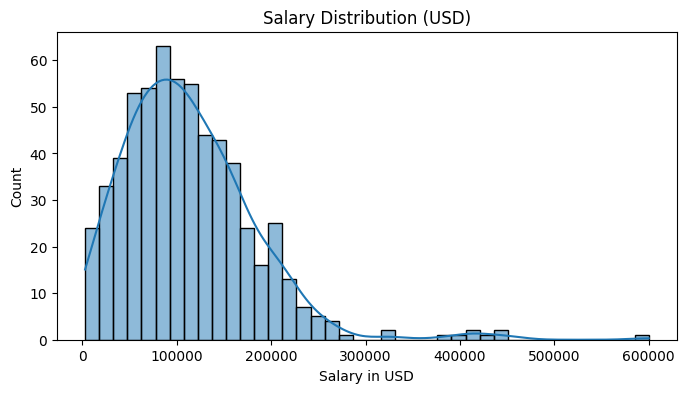

In [77]:
plt.figure(figsize=(8,4))
sns.histplot(df['salary_in_usd'], bins=40, kde=True)
plt.title("Salary Distribution (USD)")
plt.xlabel("Salary in USD")
plt.savefig("../reports/visuals/salary Distribution.png", bbox_inches='tight')
plt.show()


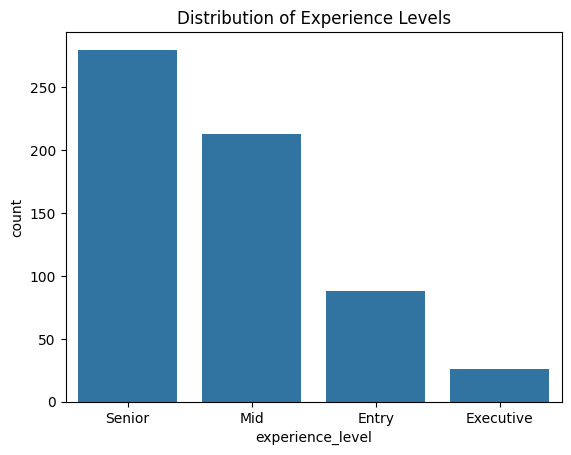

In [82]:
sns.countplot(x='experience_level', data=df, order=df['experience_level'].value_counts().index)
plt.title("Distribution of Experience Levels")
plt.savefig("../reports/visuals/Distribution of Experience Levels.png", bbox_inches='tight')

plt.show()

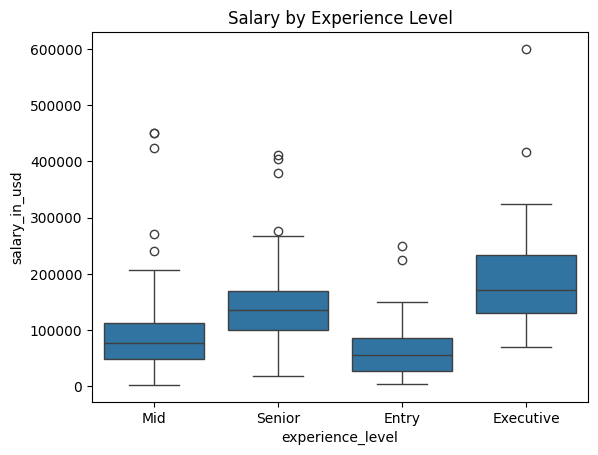

In [83]:
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title("Salary by Experience Level")
plt.savefig("../reports/visuals/Salary by Experience Level.png", bbox_inches='tight')
plt.show()

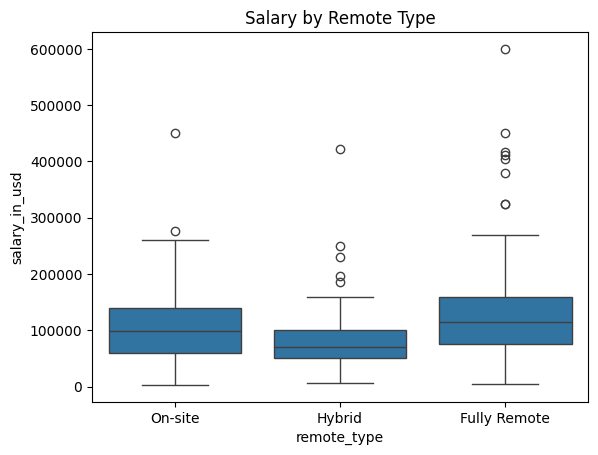

In [84]:
sns.boxplot(x='remote_type', y='salary_in_usd', data=df, order=['On-site','Hybrid','Fully Remote'])
plt.title("Salary by Remote Type")
plt.savefig("../reports/visuals/Salary by Remote Type.png", bbox_inches='tight')
plt.show()

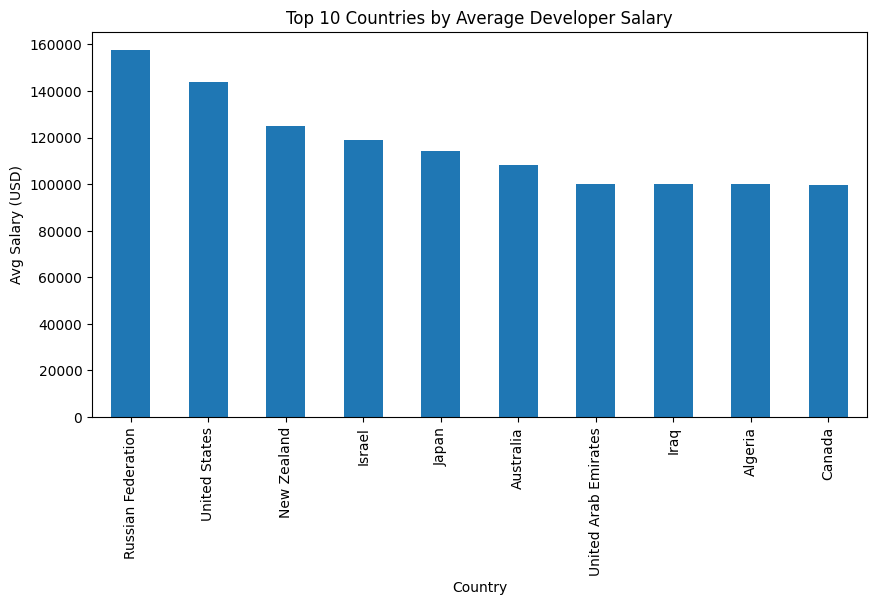

In [ ]:
country_salary = df.groupby('Country')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
country_salary.plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Countries by Average Developer Salary")
plt.ylabel("Avg Salary (USD)")
plt.savefig("../reports/visuals/Top 10 Countries by Average Developer Salary.png", bbox_inches='tight')
plt.show()


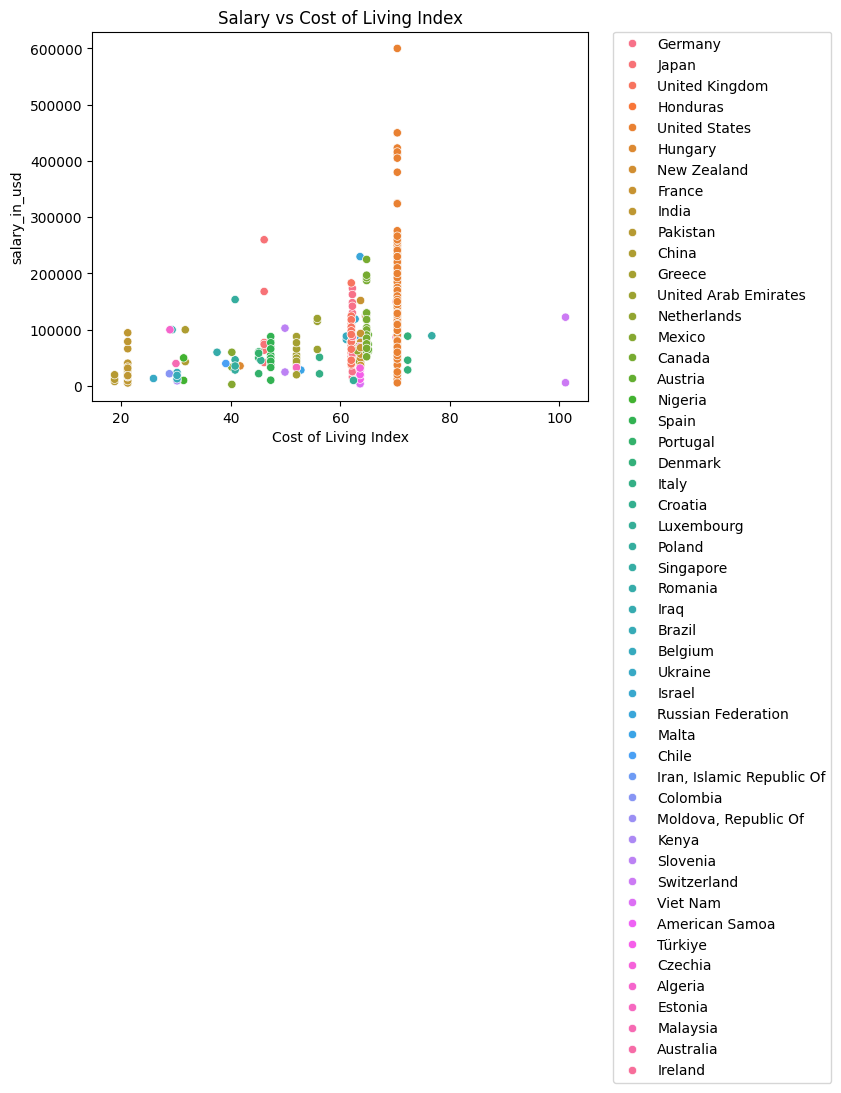

In [88]:
sns.scatterplot(x='Cost of Living Index', y='salary_in_usd', hue='Country', data=df)
plt.title("Salary vs Cost of Living Index")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)  # Outside right
plt.savefig("../reports/visuals/Salary vs Cost of Living Index.png", bbox_inches='tight')
plt.show()

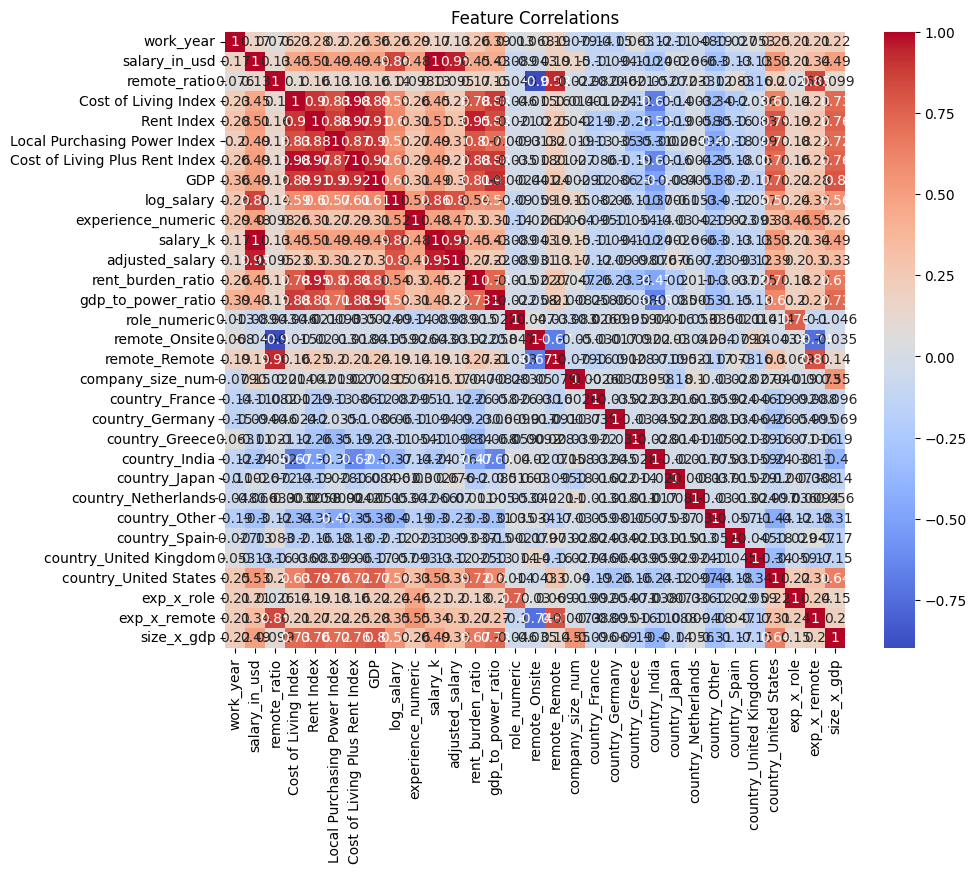

In [89]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlations")
plt.savefig("../reports/visuals/Feature Correlations", bbox_inches='tight')

plt.show()


In [12]:
df = pd.read_csv("../data/processed/engineered_salary_data.csv")
df.head()


,Country,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size,Cost of Living Index,Rent Index,...,country_India,country_Japan,country_Netherlands,country_Other,country_Spain,country_United Kingdom,country_United States,exp_x_role,exp_x_remote,size_x_gdp
0,Germany,2020,Mid,FT,Data Scientist,79833,0,L,62.200000,24.400000,...,False,False,False,False,False,False,False,8,0.0,142139.295584
1,Japan,2020,Senior,FT,Machine Learning Scientist,260000,0,S,46.100000,13.400000,...,False,True,False,False,False,False,False,12,0.0,40028.734173
2,United Kingdom,2020,Senior,FT,Big Data Engineer,109024,50,M,62.000000,31.100000,...,False,False,False,False,False,True,False,6,1.5,80809.612448
3,Honduras,2020,Mid,FT,Product Data Analyst,20000,0,S,63.606218,34.282185,...,False,False,False,True,False,False,False,6,0.0,2307.614943
4,United States,2020,Senior,FT,Machine Learning Engineer,150000,50,L,70.400000,41.700000,...,False,False,False,False,False,False,True,12,1.5,193204.522306


In [13]:
conn = sqlite3.connect("../data/salary_analysis.db")
cursor = conn.cursor()
print("✅ Connected to SQLite database.")


✅ Connected to SQLite database.


In [14]:
df.to_sql("salary_data", conn, if_exists="replace", index=False)
print("✅ DataFrame stored as 'salary_data' table in SQLite.")


✅ DataFrame stored as 'salary_data' table in SQLite.


In [15]:
query = "SELECT * FROM salary_data LIMIT 5;"
pd.read_sql(query, conn)


,Country,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size,Cost of Living Index,Rent Index,...,country_India,country_Japan,country_Netherlands,country_Other,country_Spain,country_United Kingdom,country_United States,exp_x_role,exp_x_remote,size_x_gdp
0,Germany,2020,Mid,FT,Data Scientist,79833,0,L,62.200000,24.400000,...,0,0,0,0,0,0,0,8,0.0,142139.295584
1,Japan,2020,Senior,FT,Machine Learning Scientist,260000,0,S,46.100000,13.400000,...,0,1,0,0,0,0,0,12,0.0,40028.734173
2,United Kingdom,2020,Senior,FT,Big Data Engineer,109024,50,M,62.000000,31.100000,...,0,0,0,0,0,1,0,6,1.5,80809.612448
3,Honduras,2020,Mid,FT,Product Data Analyst,20000,0,S,63.606218,34.282185,...,0,0,0,1,0,0,0,6,0.0,2307.614943
4,United States,2020,Senior,FT,Machine Learning Engineer,150000,50,L,70.400000,41.700000,...,0,0,0,0,0,0,1,12,1.5,193204.522306


In [16]:
query = """
SELECT experience_level, AVG(salary_in_usd) AS avg_salary
FROM salary_data
GROUP BY experience_level
ORDER BY avg_salary DESC;
"""
pd.read_sql(query, conn)


,experience_level,avg_salary
0,Executive,199392.038462
1,Senior,138617.292857
2,Mid,87996.056338
3,Entry,61643.318182


In [17]:
query = """
SELECT job_title, AVG(salary_in_usd) AS avg_salary
FROM salary_data
GROUP BY job_title
ORDER BY avg_salary DESC
LIMIT 10;
"""
pd.read_sql(query, conn)


,job_title,avg_salary
0,Data Analytics Lead,405000.000000
1,Principal Data Engineer,328333.333333
2,Financial Data Analyst,275000.000000
3,Principal Data Scientist,215242.428571
4,Director of Data Science,195074.000000
5,Data Architect,177873.909091
6,Applied Data Scientist,175655.000000
7,Analytics Engineer,175000.000000
8,Data Specialist,165000.000000
9,Head of Data,160162.600000


In [18]:
query = """
SELECT company_size, AVG(salary_in_usd) AS avg_salary
FROM salary_data
GROUP BY company_size
ORDER BY avg_salary DESC;
"""
pd.read_sql(query, conn)


,company_size,avg_salary
0,L,119242.994949
1,M,116905.466258
2,S,77632.674699


In [22]:
conn.close()
print("✅ SQLite connection closed.")


✅ SQLite connection closed.
